In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500k-chatgpt-tweets-jan-mar-2023/Twitter Jan Mar.csv


## import modules

In [38]:
#import modules
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [39]:
#read data
data = pd.read_csv("/kaggle/input/500k-chatgpt-tweets-jan-mar-2023/Twitter Jan Mar.csv")

In [40]:
#view the data
data.head()

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


In [41]:
#check the shape of the data(rows and columns)
data.shape

(500036, 6)

as the data is huge with 500036 rows, this will take a lot of time to process sentiment analysis on each row. hence, take a sample of the data. before that remove null values and duplicate values so that we get clean sample data

In [42]:
#check null values
data.isnull().sum()

date              0
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64

There are a few null values in the data.As the data is huge, these null values are not necessary, hence remove null values

In [43]:
#remove null values
data = data.dropna()

In [44]:
#check again for null values
data.isnull().sum()

date             0
id               0
content          0
username         0
like_count       0
retweet_count    0
dtype: int64

All the null values have been removed. Check for duplicated values present in the data(if any)

In [45]:
data.duplicated().sum()

0

there are no duplicated rows

After removing null values check for the shape of the data

In [46]:
#check the shape of the data
data.shape

(499974, 6)

Now that we have removed null values and checked for duplicated values. we can take the sample of the data

In [47]:
#take sample of the data
data = data.sample(10000)

In [48]:
#check the shape of the sample
data.shape

(10000, 6)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 449817 to 445025
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10000 non-null  object 
 1   id             10000 non-null  object 
 2   content        10000 non-null  object 
 3   username       10000 non-null  object 
 4   like_count     10000 non-null  float64
 5   retweet_count  10000 non-null  float64
dtypes: float64(2), object(4)
memory usage: 546.9+ KB


In [50]:
data.describe()

,like_count,retweet_count
count,10000.000000,10000.000000
mean,5.790200,1.118200
std,72.194565,13.220889
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.000000
max,4400.000000,960.000000


In [51]:
#print all the columns in data
data.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count'], dtype='object')

Column "content" is important to check for the sentiments , rest of the features are not necessary. 
Take out the column "content" separately

In [52]:
# take out the column "content" separately.
# create a new dataframe : contents
contents = data[["content"]].reset_index(drop = True)
contents

,content
0,I believe the moment has come to discuss AI ce...
1,Such a. Great 📍LIVE 📍 event from @jmattmiller ...
2,Chat GPT is my new friend
3,@thoughtland At least it's not Chat Gpt. your ...
4,"1/5 ""Hey everyone! I'm #ChatGPT, a language mo..."
...,...
9995,Unfortunate because there’s seems to be an inf...
9996,ChatGPT for Google: Show #ChatGPT response alo...
9997,Did you know you can send any email text to He...
9998,Chat GPT generated a list of articles for him....


# Sentiment Analysis

In [53]:
# initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [54]:
# perform sentiment analysis on each row in "content" column
#store it in a column name "sentiment_score"
contents['sentiment_score'] = contents['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [55]:
# categorize sentiment score as positive, negative, or neutral based on threshold
#store them in a column name "sentiment"
threshold = 0.05
contents['sentiment'] = contents['sentiment_score'].apply(lambda x: 'positive' if x > threshold else ('negative' if x < -threshold else 'neutral'))

In [56]:
# view resulting dataframe
contents

,content,sentiment_score,sentiment
0,I believe the moment has come to discuss AI ce...,-0.4019,negative
1,Such a. Great 📍LIVE 📍 event from @jmattmiller ...,0.6249,positive
2,Chat GPT is my new friend,0.4939,positive
3,@thoughtland At least it's not Chat Gpt. your ...,0.0000,neutral
4,"1/5 ""Hey everyone! I'm #ChatGPT, a language mo...",0.3786,positive
...,...,...,...
9995,Unfortunate because there’s seems to be an inf...,-0.5423,negative
9996,ChatGPT for Google: Show #ChatGPT response alo...,0.0000,neutral
9997,Did you know you can send any email text to He...,0.0000,neutral
9998,Chat GPT generated a list of articles for him....,0.0000,neutral


The sentiment analysis is done.
As a result we got a new dataframe with columns ["content" , "sentiment_score", "sentiment" ] with positive, negative and neutral label


# Visualization

## Visualize the count of each sentiment

In [57]:
# Get the count of each sentiment
sentiment_counts = contents['sentiment'].value_counts().reset_index(name='counts').rename(columns={'index': 'sentiment'})
sentiment_counts

,sentiment,counts
0,positive,4983
1,neutral,3434
2,negative,1583


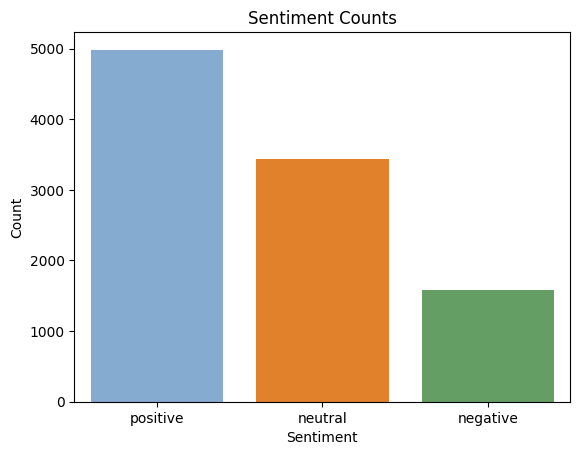

In [58]:
# Create a bar plot with custom color
sns.barplot(data=sentiment_counts, x='sentiment', y='counts', palette=['#79addc', '#ff7f0e', '#5ba85a'])

# Set chart title and axis labels
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the chart
plt.show()

Based on the visualization, it is evident that the dataset contains more positive sentiments, followed by neutral sentiments and fewer negative sentiments.

## wordcloud

### create wordclouds for each sentiment

#### word cloud for positive sentiments

In [59]:
#checking for sentiments with "positive" value
contents["sentiment"] == "positive"

0       False
1        True
2        True
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: sentiment, Length: 10000, dtype: bool

In [60]:
# taking out the positive rows separately
positive_data = contents[contents["sentiment"]=="positive"]
positive_data

,content,sentiment_score,sentiment
1,Such a. Great 📍LIVE 📍 event from @jmattmiller ...,0.6249,positive
2,Chat GPT is my new friend,0.4939,positive
4,"1/5 ""Hey everyone! I'm #ChatGPT, a language mo...",0.3786,positive
12,I can’t wait for you guys to listen to my late...,0.3400,positive
13,"@Not_your_girl_6 Yes, it's chat gpt",0.4019,positive
...,...,...,...
9987,"Well sheesh, it's about time. 😁\nAccess to Bi...",0.6597,positive
9988,@meawmixed chat 👏 gpt 👏 is 👏 a 👏 glorified 👏 s...,0.5106,positive
9990,"https://t.co/drO5DbqZUP\nOh yea ofc, the big ""...",0.4404,positive
9992,Great article on #ChatGPT which is all the buz...,0.6249,positive


In [61]:
#taking out sentences which has  positive values
str(positive_data["content"])

'1       Such a. Great 📍LIVE 📍 event from @jmattmiller ...\n2                               Chat GPT is my new friend\n4       1/5 "Hey everyone! I\'m #ChatGPT, a language mo...\n12      I can’t wait for you guys to listen to my late...\n13                    @Not_your_girl_6 Yes, it\'s chat gpt\n                              ...                        \n9987    Well sheesh, it\'s about time.  😁\\nAccess to Bi...\n9988    @meawmixed chat 👏 gpt 👏 is 👏 a 👏 glorified 👏 s...\n9990    https://t.co/drO5DbqZUP\\nOh yea ofc, the big "...\n9992    Great article on #ChatGPT which is all the buz...\n9993    #Switzerland most trending wikipedia pages for...\nName: content, Length: 4983, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

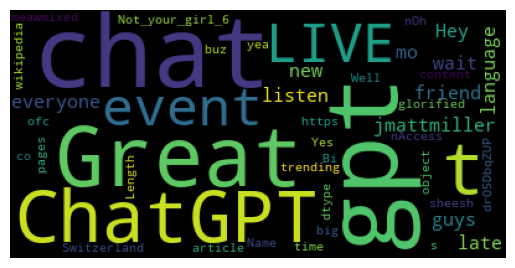

In [63]:
#initializing wordcloud
wc = WordCloud().generate(str(positive_data["content"]))

#plotting wordcloud
plt.imshow(wc);   #; if you don't want above details
plt.axis("off")# if you don't want the axis

#### wordcloud for negative sentiments

In [64]:
# taking out the negative rows separately
negative_data = contents[contents["sentiment"]=="negative"]
negative_data

,content,sentiment_score,sentiment
0,I believe the moment has come to discuss AI ce...,-0.4019,negative
5,Captcha is basically dead now. #chatGPT,-0.6486,negative
7,#ChatGPT firing 6% of my company and comping w...,-0.6705,negative
17,How #Leaders Can Avoid the Threat of #ChatGPT?...,-0.6808,negative
24,Beyond the AI tipping point – which #ChatGPT r...,-0.4215,negative
...,...,...,...
9968,"Verified, ChatGPT != Multivac;\nNow you can us...",-0.5550,negative
9973,The wonders it does are amazing but horrifying...,-0.5647,negative
9975,"Me: Write a haiku about the moon, a spider, an...",-0.5423,negative
9981,"""AI Models: Uncovering Bias with ChatGPT""\n#Ne...",-0.1027,negative


In [65]:
#taking out sentences which has  positive values
str(negative_data["content"])

'0       I believe the moment has come to discuss AI ce...\n5                 Captcha is basically dead now. #chatGPT\n7       #ChatGPT firing 6% of my company and comping w...\n17      How #Leaders Can Avoid the Threat of #ChatGPT?...\n24      Beyond the AI tipping point – which #ChatGPT r...\n                              ...                        \n9968    Verified, ChatGPT != Multivac;\\nNow you can us...\n9973    The wonders it does are amazing but horrifying...\n9975    Me: Write a haiku about the moon, a spider, an...\n9981    "AI Models: Uncovering Bias with ChatGPT"\\n#Ne...\n9995    Unfortunate because there’s seems to be an inf...\nName: content, Length: 1583, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

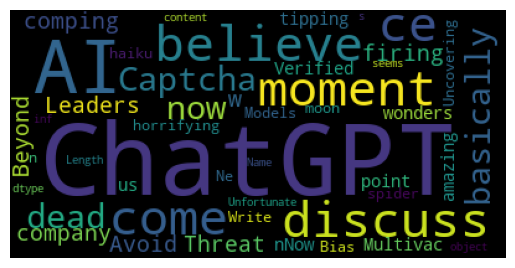

In [66]:
#initializing wordcloud
wcn = WordCloud().generate(str(negative_data["content"]))

#plotting  wordcloud
plt.imshow(wcn);   #; if you don't want above details
plt.axis("off")# if you don't want the axis

#### wordcloud for neutral sentiments

In [67]:
# taking out the neutral rows separately
neutral_data = contents[contents["sentiment"]=="neutral"]
neutral_data

,content,sentiment_score,sentiment
3,@thoughtland At least it's not Chat Gpt. your ...,0.0,neutral
6,#ChatGPT on the #Sustainability of the #Fiscal...,0.0,neutral
8,@its444you yea just start using chat gpt atp…,0.0,neutral
9,#Microsoft incorporating #ChatGPT in #Bing. \n...,0.0,neutral
10,"an #Amazon lawyer told workers that they had ""...",0.0,neutral
...,...,...,...
9994,I blew 2.5 months of Twitter blue for this #Ch...,0.0,neutral
9996,ChatGPT for Google: Show #ChatGPT response alo...,0.0,neutral
9997,Did you know you can send any email text to He...,0.0,neutral
9998,Chat GPT generated a list of articles for him....,0.0,neutral


In [68]:
#taking out sentences which has  neutral values
str(neutral_data["content"])

'3       @thoughtland At least it\'s not Chat Gpt. your ...\n6       #ChatGPT on the #Sustainability of the #Fiscal...\n8           @its444you yea just start using chat gpt atp…\n9       #Microsoft incorporating #ChatGPT in #Bing. \\n...\n10      an #Amazon lawyer told workers that they had "...\n                              ...                        \n9994    I blew 2.5 months of Twitter blue for this #Ch...\n9996    ChatGPT for Google: Show #ChatGPT response alo...\n9997    Did you know you can send any email text to He...\n9998    Chat GPT generated a list of articles for him....\n9999    Check them out and let us know which one would...\nName: content, Length: 3434, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

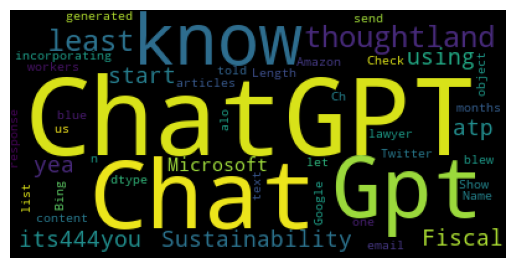

In [69]:
#initializing wordcloud
wcnl = WordCloud().generate(str(neutral_data["content"]))

#plotting  wordcloud
plt.imshow(wcnl);   #; if you don't want above details
plt.axis("off")# if you don't want the axis

Conclusion: 

*     The sentiment analysis performed on tweets using the above codes and steps showed that the majority of the tweets on ChatGPT are positive, 
      followed by neutral tweets and a small number of negative tweets. 
    
*     The sentiment analysis was performed using the Natural Language Toolkit (NLTK) and Seaborn libraries in Python. 
    
*     The tweets were scored based on their sentiment using the VADER (Valence Aware Dictionary and Sentiment Reasoner) tool, which is 
      specifically designed to analyze social media content. 
    
*     The sentiment scores for each tweet were then grouped into three categories: positive, neutral, and negative. 
        
*     For Visualization, a bar plot was created using Seaborn to visualize the count of each sentiment category. The visualization showed that the 
      majority of the tweets on ChatGPT are positive, followed by neutral tweets and a small number of negative tweets. 
    
*     Finally, word clouds were also created for each sentiment category to identify the words that contributed to the sentiment. 
      Word clouds are a visual representation of the most frequently occurring words in a text, with the size of each word indicating its frequency. 
      In this analysis, word clouds were generated using the WordCloud library in Python for each sentiment category: positive, neutral, and negative. 
      The word clouds showed the most frequently occurring words in each category, providing insights into the topics and themes associated with each 
      sentiment.
      The word clouds were helpful in providing additional context and understanding to the sentiment analysis results.
    
*     This sentiment analysis can be useful for understanding the overall sentiment of the tweets and identifying trends or patterns in the sentiment over       time.